<a href="https://colab.research.google.com/github/ravi-gopalan/lstm_analyses/blob/master/lstm_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
end_date = '2019-10-17'

In [19]:
!pip install yfinance

In [0]:
# Importing the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
# Import yfinance
import yfinance as yf 

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
!git clone -l -s git://github.com/ravi-gopalan/lstm_analyses.git cloned-repository

fatal: destination path 'cloned-repository' already exists and is not an empty directory.


In [24]:
!ls

cloned-repository  sample_data


In [0]:
def modify_features(df, window = 21, n_std = 2):
  df.drop(columns=['Adj Close'], inplace=True)
  #Calculate rolling mean and standard deviation using number of days set above
  roll_mean = df['Open'].rolling(window).mean()
  roll_std = df['Open'].rolling(window).std()
  df['rolling_mean'] = roll_mean
  #create two new DataFrame columns to hold values of upper and lower Bollinger bands
  df['bollinger_high'] = roll_mean + (roll_std * n_std)
  df['bollinger_low'] = roll_mean - (roll_std * n_std)
  return df

[*********************100%***********************]  1 of 1 downloaded


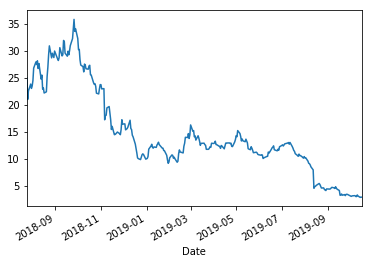

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2018-07-25 to 2019-10-16
Data columns (total 8 columns):
Open              310 non-null float64
High              310 non-null float64
Low               310 non-null float64
Close             310 non-null float64
Volume            310 non-null int64
rolling_mean      290 non-null float64
bollinger_high    290 non-null float64
bollinger_low     290 non-null float64
dtypes: float64(7), int64(1)
memory usage: 21.8 KB


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2018-07-25,18.700,25.00,18.50,25.00,13709500,NaN,NaN,NaN
2018-07-26,24.745,24.85,20.30,21.01,3628300,NaN,NaN,NaN
2018-07-27,21.200,23.00,21.20,22.60,1320700,NaN,NaN,NaN
2018-07-30,22.750,24.00,22.65,23.85,1236300,NaN,NaN,NaN
2018-07-31,24.030,26.43,22.75,23.05,2603400,NaN,NaN,NaN


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2019-10-10,3.07,3.63,3.07,3.37,3628300,3.526190,4.576533,2.475848
2019-10-11,3.46,3.55,3.16,3.17,2586300,3.455714,4.282432,2.628996
2019-10-14,3.22,3.29,2.86,2.91,3682700,3.389048,4.025284,2.752812
2019-10-15,2.90,3.04,2.77,2.97,2342400,3.314286,3.756398,2.872174
2019-10-16,2.95,3.19,2.91,2.95,2014500,3.275714,3.695265,2.856164


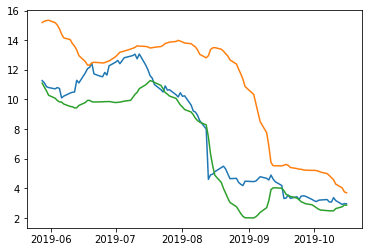

In [26]:
# Get the data for the stock BE by specifying the stock ticker, start date, and end date
df_be = yf.download('BE','2018-07-25',end_date)

df_be = modify_features(df_be)

# Plot the close prices
df_be.Close.plot()
plt.show()

sns.lineplot(data=df_be['Close'][-100:])
sns.lineplot(data=df_be['bollinger_high'][-100:])
sns.lineplot(data=df_be['bollinger_low'][-100:])


df_be.info()
df_be.head()
df_be.tail()


[*********************100%***********************]  1 of 1 downloaded


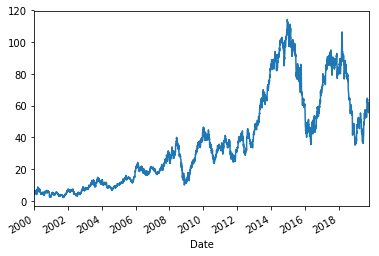

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4979 entries, 2000-01-03 to 2019-10-16
Data columns (total 8 columns):
Open              4979 non-null float64
High              4979 non-null float64
Low               4979 non-null float64
Close             4979 non-null float64
Volume            4979 non-null int64
rolling_mean      4959 non-null float64
bollinger_high    4959 non-null float64
bollinger_low     4959 non-null float64
dtypes: float64(7), int64(1)
memory usage: 350.1 KB


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2000-01-03,4.25,4.25,3.94,3.94,2461900,NaN,NaN,NaN
2000-01-04,3.94,5.00,3.88,4.69,7660300,NaN,NaN,NaN
2000-01-05,4.75,4.75,4.12,4.38,3944600,NaN,NaN,NaN
2000-01-06,4.50,4.69,4.31,4.56,2468400,NaN,NaN,NaN
2000-01-07,4.62,5.62,4.62,5.62,9783000,NaN,NaN,NaN


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2019-10-10,56.40,57.82,56.13,57.34,2361600,60.584762,66.240098,54.929426
2019-10-11,58.54,59.28,58.01,58.35,2617800,60.300000,65.720446,54.879554
2019-10-14,59.61,60.23,58.80,59.28,3745100,60.075714,65.177979,54.973450
2019-10-15,59.31,60.94,59.26,60.82,3573700,59.866190,64.695722,55.036659
2019-10-16,60.94,61.09,59.34,59.46,2716600,59.770952,64.421462,55.120443


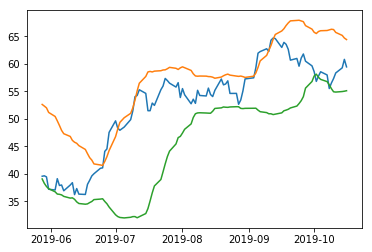

In [27]:
# Get the data for the stock WDC by specifying the stock ticker, start date, and end date
df_wdc = yf.download('WDC','2000-01-01',end_date)


df_wdc = modify_features(df_wdc)

# Plot the close prices
df_wdc.Close.plot()
plt.show()

sns.lineplot(data=df_wdc['Close'][-100:])
sns.lineplot(data=df_wdc['bollinger_high'][-100:])
sns.lineplot(data=df_wdc['bollinger_low'][-100:])


df_wdc.info()
df_wdc.head()
df_wdc.tail()

[*********************100%***********************]  1 of 1 downloaded


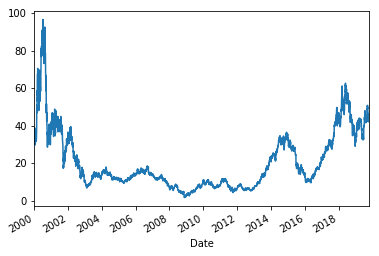

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4979 entries, 2000-01-03 to 2019-10-16
Data columns (total 8 columns):
Open              4979 non-null float64
High              4979 non-null float64
Low               4979 non-null float64
Close             4979 non-null float64
Volume            4979 non-null int64
rolling_mean      4959 non-null float64
bollinger_high    4959 non-null float64
bollinger_low     4959 non-null float64
dtypes: float64(7), int64(1)
memory usage: 350.1 KB


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2000-01-03,38.69,39.06,36.25,37.97,6564600,NaN,NaN,NaN
2000-01-04,37.38,37.91,36.44,36.50,7220800,NaN,NaN,NaN
2000-01-05,36.06,37.38,35.03,36.38,6763800,NaN,NaN,NaN
2000-01-06,36.38,37.66,35.88,37.00,6338400,NaN,NaN,NaN
2000-01-07,36.88,36.88,34.00,35.25,9467200,NaN,NaN,NaN


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2019-10-10,42.87,43.79,42.61,43.28,15572600,46.863810,54.002278,39.725341
2019-10-11,44.39,45.82,44.28,45.10,27483700,46.558571,53.536512,39.580631
2019-10-14,44.96,45.33,44.80,44.86,12443300,46.294286,53.060867,39.527704
2019-10-15,45.21,46.55,45.04,46.46,17767700,46.088571,52.702954,39.474189
2019-10-16,45.99,46.55,45.08,45.16,16646900,45.889048,52.232299,39.545796


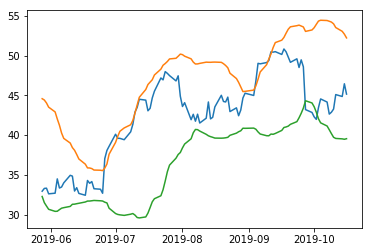

In [28]:
# Get the data for the stock MU by specifying the stock ticker, start date, and end date
df_mu = yf.download('MU','2000-01-01',end_date)


df_mu = modify_features(df_mu)

# Plot the close prices
df_mu.Close.plot()
plt.show()

sns.lineplot(data=df_mu['Close'][-100:])
sns.lineplot(data=df_mu['bollinger_high'][-100:])
sns.lineplot(data=df_mu['bollinger_low'][-100:])


df_mu.info()
df_mu.head()
df_mu.tail()

[*********************100%***********************]  1 of 1 downloaded


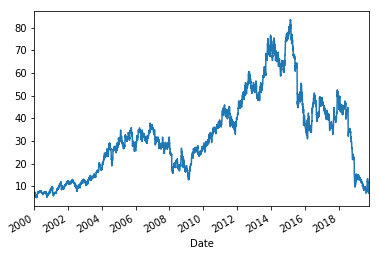

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4979 entries, 2000-01-03 to 2019-10-16
Data columns (total 8 columns):
Open              4979 non-null float64
High              4979 non-null float64
Low               4979 non-null float64
Close             4979 non-null float64
Volume            4979 non-null int64
rolling_mean      4959 non-null float64
bollinger_high    4959 non-null float64
bollinger_low     4959 non-null float64
dtypes: float64(7), int64(1)
memory usage: 350.1 KB


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2000-01-03,6.38,6.44,5.75,5.94,239200,NaN,NaN,NaN
2000-01-04,5.91,6.03,5.72,5.75,175400,NaN,NaN,NaN
2000-01-05,5.77,5.88,5.72,5.88,80600,NaN,NaN,NaN
2000-01-06,5.94,6.25,5.75,5.88,213800,NaN,NaN,NaN
2000-01-07,5.88,6.03,5.75,6.03,155800,NaN,NaN,NaN


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2019-10-10,7.35,7.43,7.02,7.03,1240100,10.660000,15.150220,6.169780
2019-10-11,7.21,7.30,7.10,7.12,1345700,10.430000,15.113964,5.746036
2019-10-14,7.02,7.18,6.80,7.09,1277400,10.187619,15.030543,5.344695
2019-10-15,7.04,7.18,6.92,7.07,968200,9.953810,14.912097,4.995522
2019-10-16,7.06,7.22,6.88,6.91,911800,9.690952,14.649770,4.732134


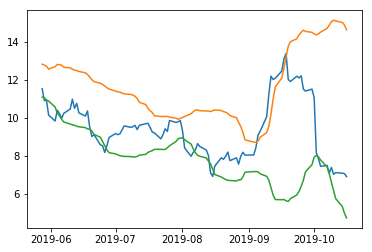

In [29]:
# Get the data for the stock UNFI by specifying the stock ticker, start date, and end date
df_unfi = yf.download('UNFI','2000-01-01',end_date)

df_unfi = modify_features(df_unfi)

# Plot the close prices
df_unfi.Close.plot()
plt.show()

sns.lineplot(data=df_unfi['Close'][-100:])
sns.lineplot(data=df_unfi['bollinger_high'][-100:])
sns.lineplot(data=df_unfi['bollinger_low'][-100:])


df_unfi.info()
df_unfi.head()
df_unfi.tail()

[*********************100%***********************]  1 of 1 downloaded


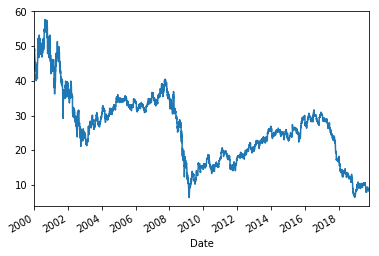

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4979 entries, 2000-01-03 to 2019-10-16
Data columns (total 8 columns):
Open              4979 non-null float64
High              4979 non-null float64
Low               4979 non-null float64
Close             4979 non-null float64
Volume            4979 non-null int64
rolling_mean      4959 non-null float64
bollinger_high    4959 non-null float64
bollinger_low     4959 non-null float64
dtypes: float64(7), int64(1)
memory usage: 350.1 KB


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2000-01-03,49.04,49.26,47.82,48.08,22952500,NaN,NaN,NaN
2000-01-04,47.20,47.44,46.15,46.15,23006200,NaN,NaN,NaN
2000-01-05,46.07,47.12,45.69,46.07,28384500,NaN,NaN,NaN
2000-01-06,45.87,47.10,45.71,46.69,20668100,NaN,NaN,NaN
2000-01-07,47.44,48.68,47.12,48.50,20947000,NaN,NaN,NaN


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2019-10-10,8.34,8.52,8.31,8.45,30546100,8.977619,9.755331,8.199907
2019-10-11,8.59,8.92,8.58,8.80,55835000,8.939048,9.709084,8.169011
2019-10-14,8.84,8.85,8.64,8.72,34052700,8.916667,9.668527,8.164807
2019-10-15,8.74,8.92,8.61,8.89,38834300,8.890000,9.624275,8.155725
2019-10-16,8.86,9.07,8.84,8.90,57841500,8.869048,9.578890,8.159205


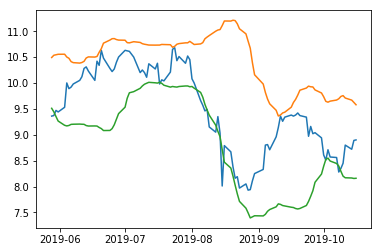

In [30]:
# Get the data for the stock GE by specifying the stock ticker, start date, and end date
df_ge = yf.download('GE','2000-01-01',end_date)

df_ge = modify_features(df_ge)

# Plot the close prices
df_ge.Close.plot()
plt.show()

sns.lineplot(data=df_ge['Close'][-100:])
sns.lineplot(data=df_ge['bollinger_high'][-100:])
sns.lineplot(data=df_ge['bollinger_low'][-100:])

df_ge.info()
df_ge.head()
df_ge.tail()

[*********************100%***********************]  1 of 1 downloaded


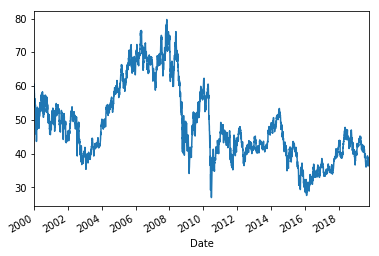

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4979 entries, 2000-01-03 to 2019-10-16
Data columns (total 8 columns):
Open              4979 non-null float64
High              4979 non-null float64
Low               4979 non-null float64
Close             4979 non-null float64
Volume            4979 non-null int64
rolling_mean      4959 non-null float64
bollinger_high    4959 non-null float64
bollinger_low     4959 non-null float64
dtypes: float64(7), int64(1)
memory usage: 350.1 KB


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2000-01-03,59.25,59.31,58.50,58.81,2039300,NaN,NaN,NaN
2000-01-04,58.44,59.44,58.25,58.50,3825800,NaN,NaN,NaN
2000-01-05,57.94,60.50,57.75,60.50,4055900,NaN,NaN,NaN
2000-01-06,59.69,60.62,59.31,60.62,4034700,NaN,NaN,NaN
2000-01-07,58.50,59.50,58.50,59.50,4027200,NaN,NaN,NaN


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2019-10-10,37.25,37.35,37.00,37.16,8344100,37.970000,39.921902,36.018098
2019-10-11,37.51,37.59,37.36,37.46,6911600,37.976190,39.921045,36.031336
2019-10-14,37.28,37.52,37.20,37.42,3237800,37.950476,39.918150,35.982803
2019-10-15,37.47,37.66,37.27,37.36,5254500,37.837143,39.609803,36.064482
2019-10-16,37.47,37.62,37.18,37.21,4789500,37.737143,39.326711,36.147575


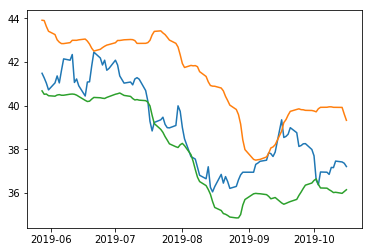

In [31]:
# Get the data for the stock BP by specifying the stock ticker, start date, and end date
df_bp = yf.download('BP','2000-01-01',end_date)

df_bp = modify_features(df_bp)

# Plot the close prices
df_bp.Close.plot()
plt.show()

sns.lineplot(data=df_bp['Close'][-100:])
sns.lineplot(data=df_bp['bollinger_high'][-100:])
sns.lineplot(data=df_bp['bollinger_low'][-100:])

df_bp.info()
df_bp.head()
df_bp.tail()

In [0]:
def get_data_slice_details(df):
  try:
    begin_train = df.index.get_loc('2008-12-31')  + 1
  except:
    begin_train = 1
  
  end_train = df.index.get_loc('2018-12-31')
  begin_valid = end_train+1
  end_valid = df.index.get_loc('2019-05-31')
  begin_test = end_valid+1
  end_test = df.index.get_loc('2019-10-14')
  train_array = df.values[begin_train:end_train,3]
  valid_array = df.values[begin_valid:end_valid,3]
  test_array = df.values[begin_test:end_test,3]

  print(train_array.shape, valid_array.shape, test_array.shape)



  return train_array, valid_array, test_array

#Scale the close data

def scale_all_inputs(train_array, valid_array, test_array):
  sc_model = MinMaxScaler((0, 1))
  train_scaled_array = sc_model.fit_transform(train_array.reshape(-1, 1))
  valid_scaled_array = sc_model.transform(valid_array.reshape(-1, 1))
  test_scaled_array = sc_model.transform(test_array.reshape(-1, 1))
  print(train_scaled_array.shape, valid_scaled_array.shape, test_scaled_array.shape)
  return sc_model, train_scaled_array, valid_scaled_array, test_scaled_array   


# Create data structures with x timesteps and 1 output

def create_data_structures(timesteps, train_array, valid_array, test_array):
  sc_model, train_scaled_array, valid_scaled_array, test_scaled_array = scale_all_inputs(train_array, valid_array, test_array)
  
  
  X_train = []
  y_train = []
  for i in range(timesteps, train_array.shape[0]):
    X_train.append(train_scaled_array[i-timesteps:i,0])
    y_train.append(train_scaled_array[i,0])
  X_train, y_train  = np.array(X_train), np.array(y_train)
  #reshape
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
  print(X_train.shape, y_train.shape)

  X_valid = []
  for i in range(timesteps, timesteps+valid_scaled_array.shape[0]):
    X_valid.append(np.concatenate((train_scaled_array[-timesteps:],valid_scaled_array),0)[i-timesteps:i,0])
  X_valid = np.array(X_valid)
  X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
  print(X_valid.shape)

  X_test = []
  for i in range(timesteps, timesteps+test_scaled_array.shape[0]):
    X_test.append(np.concatenate((valid_scaled_array[-timesteps:],test_scaled_array),0)[i-timesteps:i,0])
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  print(X_test.shape)

  return sc_model, X_train, y_train, X_valid, X_test

def create_lstm_model(X_train):
  # Initialising the RNN
  regressor = Sequential()

  # Adding the first LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  regressor.add(Dropout(rate=0.2))

  # Adding a second LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units = 100, return_sequences = True))
  regressor.add(Dropout(rate=0.2))

  # Adding a third LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units = 100, return_sequences = True))
  regressor.add(Dropout(rate=0.2))

  # Adding a fourth LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units = 100))
  regressor.add(Dropout(rate=0.2))

  # Adding the output layer
  regressor.add(Dense(units = 1))

  return regressor

In [0]:
def create_plots(df, valid_array, test_array, valid_preds,test_preds):
  plot_data = pd.DataFrame(np.datetime_as_string(df.index.values[-(valid_array.shape[0]+test_array.shape[0]):], unit='D'))
  plot_data.columns = ['date']
  plot_data['date'] = pd.to_datetime(plot_data['date'],format='%Y-%m-%d')
  plot_data['close_price']=np.concatenate((valid_array,test_array),0)
  plot_data['pred_close_price']=np.concatenate((valid_preds[0],test_preds[0]),0)
  plot_data['bollinger_high'] = plot_data['close_price'].rolling(21).mean() - 2*plot_data['close_price'].rolling(21).std()
  plot_data['bollinger_low'] = plot_data['close_price'].rolling(21).mean() + 2*plot_data['close_price'].rolling(21).std()
  plot_data.set_index('date',inplace=True)
  plot_data.info()
  plot_data.head()
  plot_data.tail()
  plt.figure(figsize=(10,10))
  plt.title('Stock Price Prediction')
  plt.xlabel('Date')
  plt.ylabel('Stock Price')
 
  plt.plot(plot_data['close_price'],color='b')
  plt.plot(plot_data['pred_close_price'],'ro--',markersize=2)
  plt.plot(plot_data['bollinger_high'])
  plt.plot(plot_data['bollinger_low'])
  plt.legend()
  return plot_data



In [0]:
def run_lstm_model(df, timesteps=30, epoch_trials = [100], batch_size_trials = [128]):
  train_array, valid_array, test_array = get_data_slice_details(df)
  sc_model, X_train, y_train, X_valid, X_test = create_data_structures(timesteps, train_array, valid_array, test_array)

  regressor = create_lstm_model(X_train)
  regressor.compile(optimizer = 'nadam', loss = 'mean_squared_error')

  reg_models = []
  for n_epochs in epoch_trials:
    for b_size in batch_size_trials:
      regressor.fit(X_train, y_train, epochs = n_epochs, batch_size = b_size)
      reg_models.append(regressor)
  
  valid_preds = []
  test_preds = []

  for reg_model in reg_models:
    valid_preds.append(sc_model.inverse_transform(reg_model.predict(X_valid)))
    test_preds.append(sc_model.inverse_transform(reg_model.predict(X_test)))    

  plot = create_plots(df, valid_array, test_array, valid_preds, test_preds)

  return reg_models

(2515,) (103,) (93,)
(2515, 1) (103, 1) (93, 1)
(2485, 30, 1) (2485,)
(103, 30, 1)
(93, 30, 1)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





2485/2485 [==============================] - 12s 5ms/step - loss: 0.0579
Epoch 2/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0211
Epoch 3/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0110
Epoch 4/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0113
Epoch 5/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0068
Epoch 6/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0078
Epoch 7/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0058
Epoch 8/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0059
Epoch 9/10

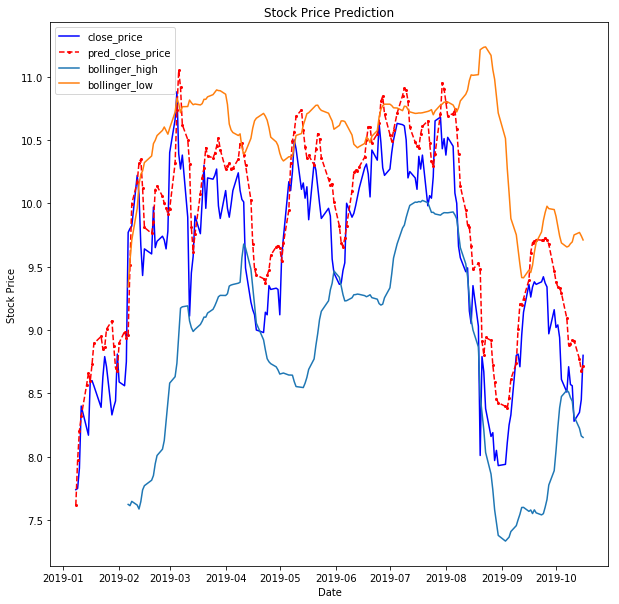

In [35]:
reg_models_ge = run_lstm_model(df_ge)
reg_models_ge[0].save('reg_model_ge.hdf5')


(2515,) (103,) (93,)
(2515, 1) (103, 1) (93, 1)
(2485, 30, 1) (2485,)
(103, 30, 1)
(93, 30, 1)
Epoch 1/100
2485/2485 [==============================] - 8s 3ms/step - loss: 0.0599
Epoch 2/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0088
Epoch 3/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0072
Epoch 4/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0052
Epoch 5/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0045
Epoch 6/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0073
Epoch 7/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0044
Epoch 8/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0046
Epoch 9/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0031
Epoch 10/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0053
Epoch 11/100
2485/2485 [==============================] - 5s 2ms

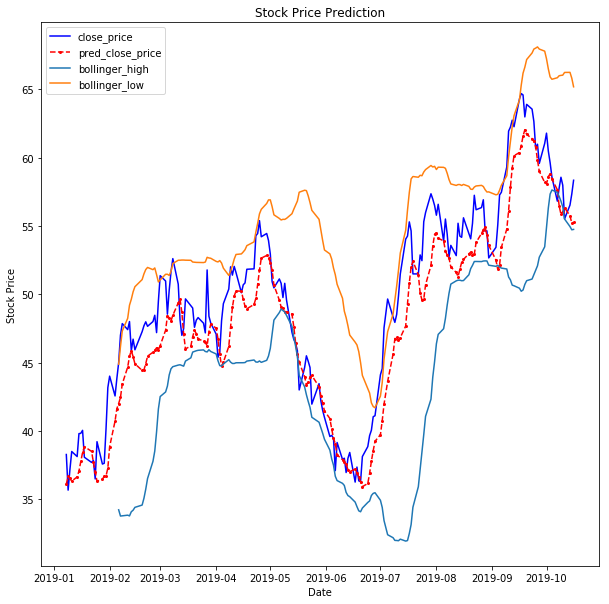

In [36]:
reg_models_wdc = run_lstm_model(df_wdc)
reg_models_wdc[0].save('reg_model_wdc.hdf5')

(2515,) (103,) (93,)
(2515, 1) (103, 1) (93, 1)
(2485, 30, 1) (2485,)
(103, 30, 1)
(93, 30, 1)
Epoch 1/100
2485/2485 [==============================] - 8s 3ms/step - loss: 0.0282
Epoch 2/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0039
Epoch 3/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0038
Epoch 4/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0037
Epoch 5/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0039
Epoch 6/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0019
Epoch 7/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0041
Epoch 8/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0022
Epoch 9/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0022
Epoch 10/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0025
Epoch 11/100
2485/2485 [==============================] - 5s 2ms

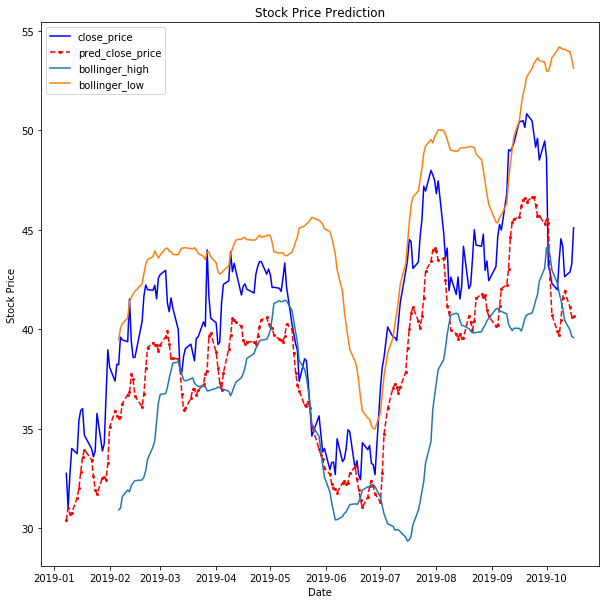

In [37]:
reg_models_mu = run_lstm_model(df_mu)
reg_models_mu[0].save('reg_model_mu.hdf5')

(2515,) (103,) (93,)
(2515, 1) (103, 1) (93, 1)
(2485, 30, 1) (2485,)
(103, 30, 1)
(93, 30, 1)
Epoch 1/100
2485/2485 [==============================] - 9s 4ms/step - loss: 0.1174
Epoch 2/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0097
Epoch 3/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0060
Epoch 4/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0063
Epoch 5/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0051
Epoch 6/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0050
Epoch 7/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0044
Epoch 8/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0055
Epoch 9/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0030
Epoch 10/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0040
Epoch 11/100
2485/2485 [==============================] - 5s 2ms

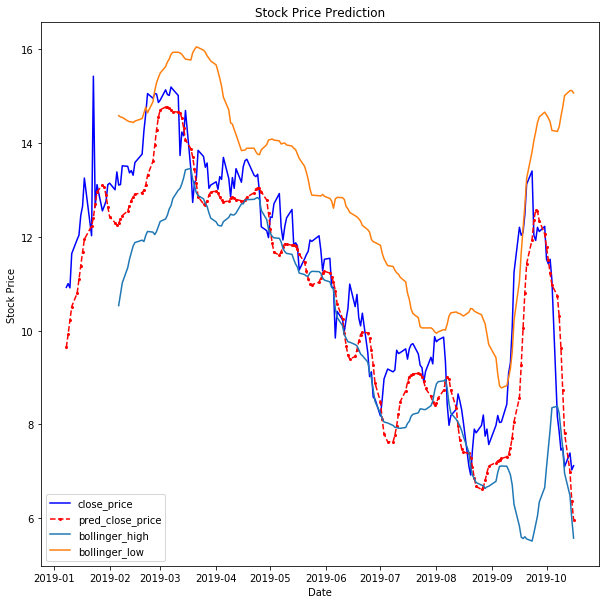

In [38]:
reg_models_unfi = run_lstm_model(df_unfi)
reg_models_unfi[0].save('reg_model_unfi.hdf5')

(108,) (103,) (93,)
(108, 1) (103, 1) (93, 1)
(78, 30, 1) (78,)
(103, 30, 1)
(93, 30, 1)
Epoch 1/100
78/78 [==============================] - 5s 69ms/step - loss: 0.2975
Epoch 2/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1395
Epoch 3/100
78/78 [==============================] - 0s 3ms/step - loss: 0.2025
Epoch 4/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1452
Epoch 5/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1144
Epoch 6/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0783
Epoch 7/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0466
Epoch 8/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0362
Epoch 9/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0363
Epoch 10/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0324
Epoch 11/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0305
Epoch 12/100
78/78 [========

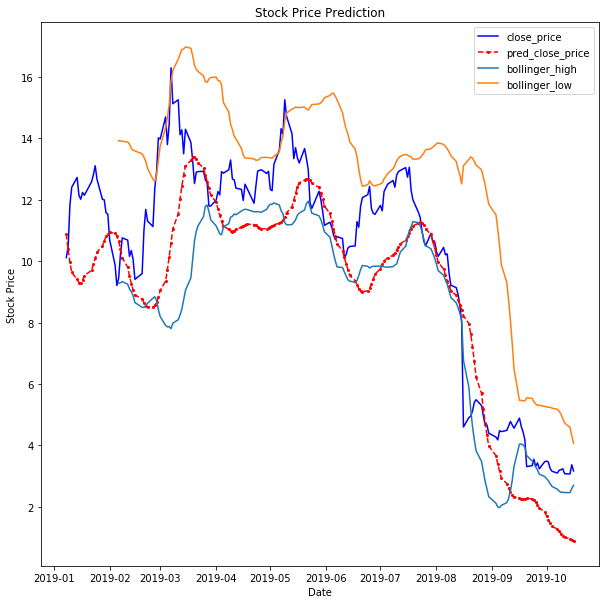

In [39]:
reg_models_be = run_lstm_model(df_be)
reg_models_be[0].save('reg_model_be.hdf5')

(2515,) (103,) (93,)
(2515, 1) (103, 1) (93, 1)
(2485, 30, 1) (2485,)
(103, 30, 1)
(93, 30, 1)
Epoch 1/100
2485/2485 [==============================] - 11s 4ms/step - loss: 0.0380
Epoch 2/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0106
Epoch 3/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0112
Epoch 4/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0086
Epoch 5/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0062
Epoch 6/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0067
Epoch 7/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0041
Epoch 8/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0046
Epoch 9/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0047
Epoch 10/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0042
Epoch 11/100
2485/2485 [==============================] - 5s 2m

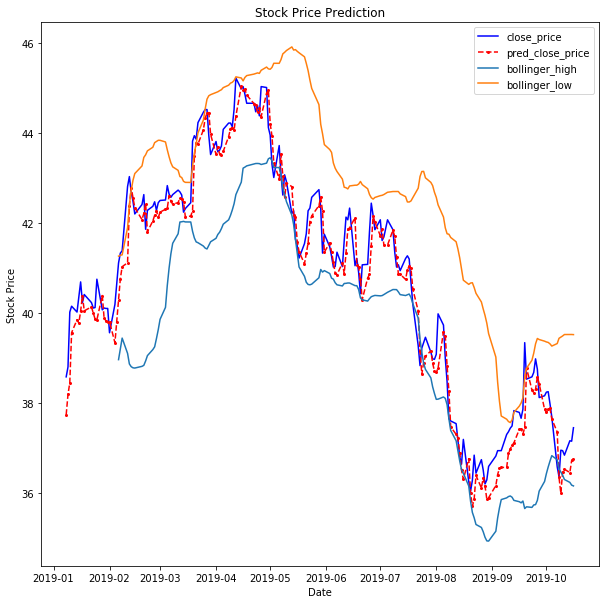

In [40]:
reg_models_bp = run_lstm_model(df_bp)
reg_models_bp[0].save('reg_model_bp.hdf5')